In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\hp\Desktop\Data Science and Analytics\Projects\healthcare\Healthcare_Data_Analysis.xlsx")

In [3]:
df.head()

,Patient ID,Age,Gender,Diagnosis,Treatment,Outcome,Length of Stay,Readmission
0,Patient-4279,70,Other,Heart Disease,image,Deceased,9,Yes
1,Patient-1803,74,Other,Hypertension,expert,Deceased,21,Yes
2,Patient-4069,88,Male,Diabetes,news,Deteriorated,6,Yes
3,Patient-2372,15,Other,Flu,leave,Deceased,19,Yes
4,Patient-9117,8,Male,COVID-19,think,Deteriorated,9,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient ID      5000 non-null   object
 1   Age             5000 non-null   int64 
 2   Gender          5000 non-null   object
 3   Diagnosis       5000 non-null   object
 4   Treatment       5000 non-null   object
 5   Outcome         5000 non-null   object
 6   Length of Stay  5000 non-null   int64 
 7   Readmission     5000 non-null   object
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


In [10]:
df['Patient ID'] = df['Patient ID'].str.split('-').str[1].astype(int)

In [12]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient ID      5000 non-null   int32 
 1   Age             5000 non-null   int64 
 2   Gender          5000 non-null   object
 3   Diagnosis       5000 non-null   object
 4   Treatment       5000 non-null   object
 5   Outcome         5000 non-null   object
 6   Length of Stay  5000 non-null   int64 
 7   Readmission     5000 non-null   object
dtypes: int32(1), int64(2), object(5)
memory usage: 293.1+ KB


In [14]:
df['Patient ID'].nunique()

3939

In [16]:
df = df.drop_duplicates(subset=['Patient ID'], keep='first')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3939 entries, 0 to 4998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient ID      3939 non-null   int32 
 1   Age             3939 non-null   int64 
 2   Gender          3939 non-null   object
 3   Diagnosis       3939 non-null   object
 4   Treatment       3939 non-null   object
 5   Outcome         3939 non-null   object
 6   Length of Stay  3939 non-null   int64 
 7   Readmission     3939 non-null   object
dtypes: int32(1), int64(2), object(5)
memory usage: 261.6+ KB


In [20]:
df.nunique()

Patient ID        3939
Age                101
Gender               3
Diagnosis            5
Treatment          956
Outcome              4
Length of Stay      30
Readmission          2
dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Other     1343
Female    1321
Male      1275
Name: count, dtype: int64

In [24]:
df['Diagnosis'].value_counts()

Diagnosis
Hypertension     821
Heart Disease    800
Diabetes         795
Flu              773
COVID-19         750
Name: count, dtype: int64

In [26]:
df['Outcome'].value_counts()

Outcome
Recovered       1018
Deteriorated    1000
Improved         987
Deceased         934
Name: count, dtype: int64

In [28]:
df['Length of Stay'].value_counts()

Length of Stay
15    153
2     150
23    144
25    143
11    142
22    142
9     140
18    139
7     138
19    138
27    138
14    138
1     137
4     136
26    135
13    131
20    131
29    130
3     129
21    128
10    128
5     126
8     126
24    125
16    122
17    119
28    116
12    109
30    105
6     101
Name: count, dtype: int64

In [30]:
df['Readmission'].value_counts()

Readmission
Yes    1985
No     1954
Name: count, dtype: int64

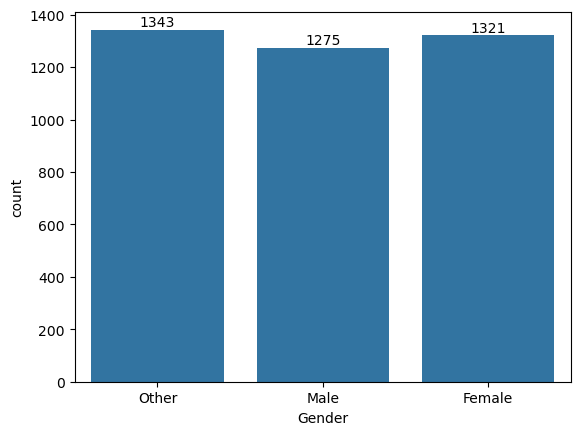

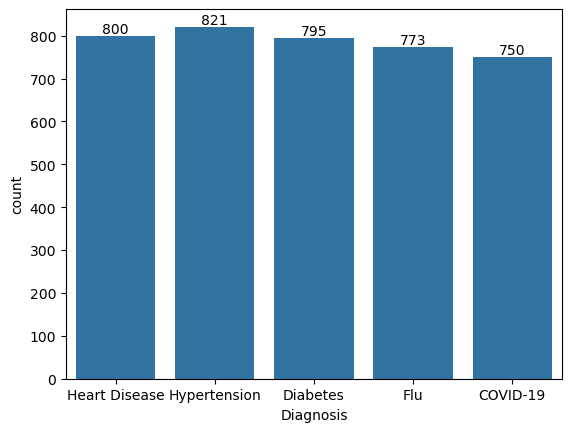

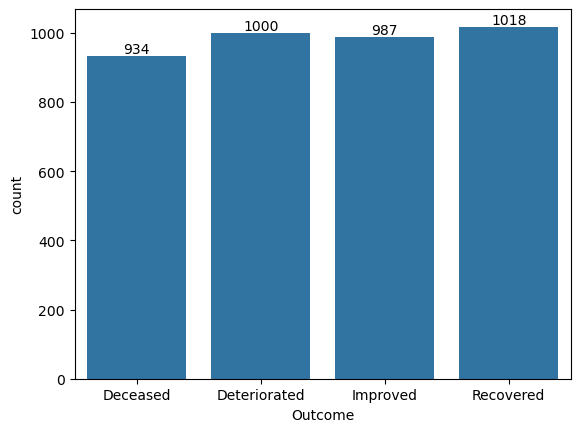

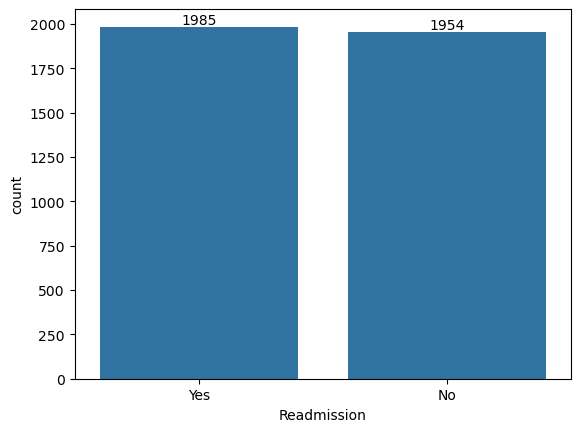

In [38]:
temp=['Gender','Diagnosis','Outcome','Readmission']
for i in temp:
    ax=sns.countplot(x=i,data=df)
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

In [52]:
import pandas as pd

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = pd.factorize(df[col])[0]

df.head()


,Patient ID,Age,Gender,Diagnosis,Treatment,Outcome,Length of Stay,Readmission
0,4279,70,0,0,0,0,9,0
1,1803,74,0,1,1,0,21,0
2,4069,88,1,2,2,1,6,0
3,2372,15,0,3,3,0,19,0
4,9117,8,1,4,4,1,9,0


In [48]:
correlation_matrix = df.corr()

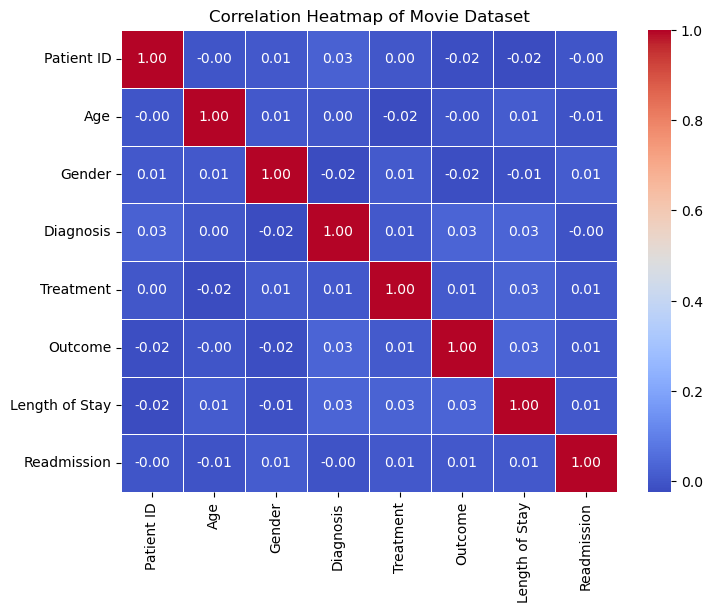

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Movie Dataset")
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

x = df[[ 'Gender', 'Diagnosis', 'Treatment','Outcome',]]  
y = df['Readmission']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic report
               precision    recall  f1-score   support

           0       0.48      0.62      0.54       393
           1       0.48      0.34      0.40       395

    accuracy                           0.48       788
   macro avg       0.48      0.48      0.47       788
weighted avg       0.48      0.48      0.47       788

Accuracy score  0.48096446700507617


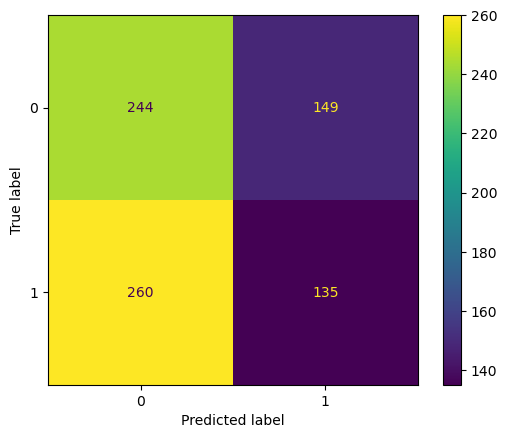

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train) # for training
y_predlr=lr.predict(x_test) # for prediction
print("logistic report\n",classification_report(y_test,y_predlr))
print("Accuracy score ",accuracy_score(y_test,y_predlr))

from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_predlr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()

plt.show()

logistic report
               precision    recall  f1-score   support

           0       0.52      0.48      0.50       393
           1       0.52      0.56      0.54       395

    accuracy                           0.52       788
   macro avg       0.52      0.52      0.52       788
weighted avg       0.52      0.52      0.52       788

Accuracy score  0.5215736040609137


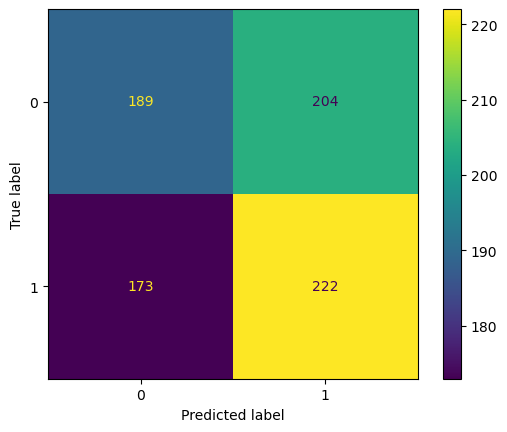

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train) # for training
y_predgb=gb.predict(x_test) # for prediction
print("logistic report\n",classification_report(y_test,y_predgb))
print("Accuracy score ",accuracy_score(y_test,y_predgb))


from sklearn import metrics
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_predgb)

# Create and display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()

logistic report
               precision    recall  f1-score   support

           0       0.52      0.48      0.50       393
           1       0.52      0.56      0.54       395

    accuracy                           0.52       788
   macro avg       0.52      0.52      0.52       788
weighted avg       0.52      0.52      0.52       788

Accuracy score  0.49619289340101524


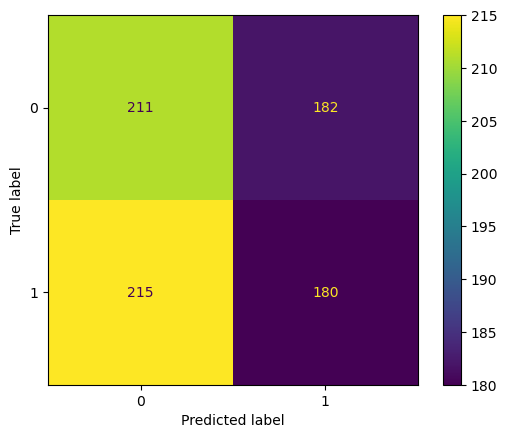

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

knn=KNeighborsClassifier()
knn.fit(x_train,y_train) # for training
y_predknn=knn.predict(x_test) # for prediction
print("logistic report\n",classification_report(y_test,y_predgb))
print("Accuracy score ",accuracy_score(y_test,y_predknn))


from sklearn import metrics
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_predknn)

# Create and display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()

logistic report
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       393
           1       0.49      0.49      0.49       395

    accuracy                           0.49       788
   macro avg       0.49      0.49      0.49       788
weighted avg       0.49      0.49      0.49       788

Accuracy score  0.49238578680203043


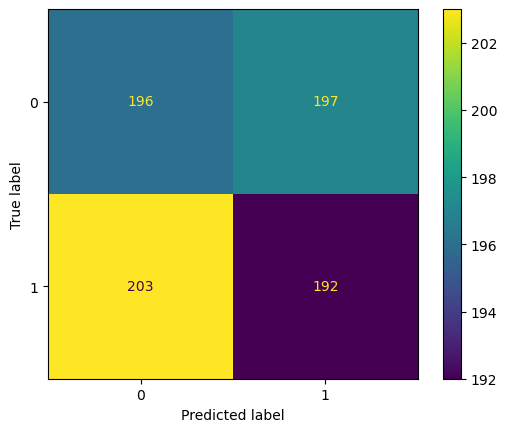

In [72]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

xgb=XGBClassifier()
xgb.fit(x_train,y_train) # for training
y_predxgb=xgb.predict(x_test) # for prediction
print("logistic report\n",classification_report(y_test,y_predxgb))
print("Accuracy score ",accuracy_score(y_test,y_predxgb))


from sklearn import metrics
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_predxgb)

# Create and display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()

logistic report
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       393
           1       0.48      0.48      0.48       395

    accuracy                           0.48       788
   macro avg       0.48      0.48      0.48       788
weighted avg       0.48      0.48      0.48       788

Accuracy score  0.48350253807106597


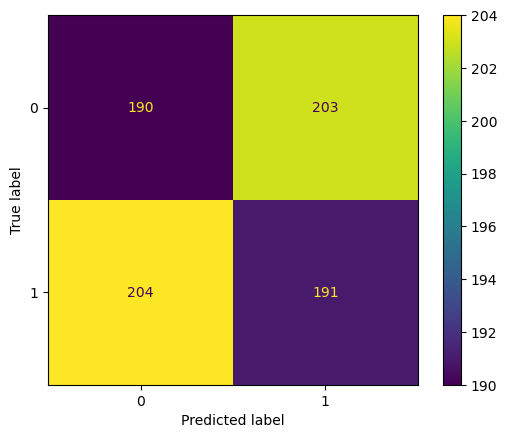

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

svc=SVC()
svc.fit(x_train,y_train) # for training
y_predsvc=svc.predict(x_test) # for prediction
print("logistic report\n",classification_report(y_test,y_predsvc))
print("Accuracy score ",accuracy_score(y_test,y_predsvc))


from sklearn import metrics
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_predsvc)

# Create and display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()

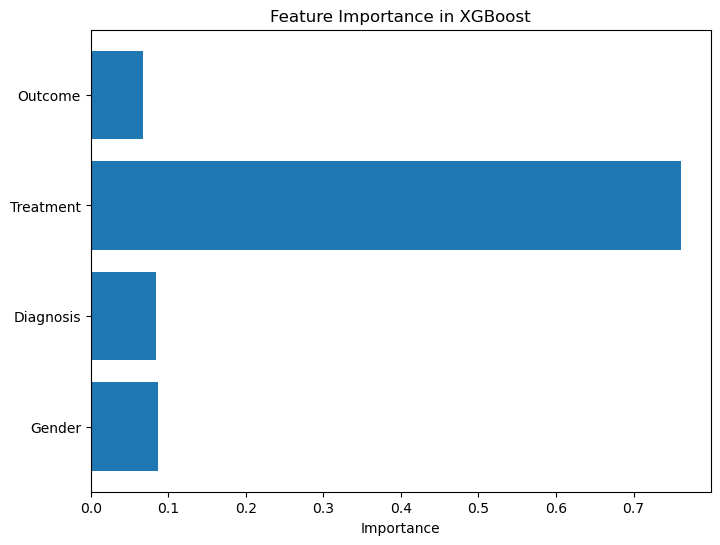

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(x_train.columns, gb.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance in XGBoost")
plt.show()


In [90]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.5166483032727089
